In [1]:
import pandas as pd

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.io.shapereader as shpreader
import itertools

%matplotlib inline

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

In [81]:
ODB2015Score = pd.read_csv('data/ODB-3rdEdition-Rankings.csv', # Got 403 forbidden on the URL
                           usecols=['ODB-Rank', 'Region', 'ISO3', 'Country', 'ODB-Score-Scaled'])
ODB2015Score = ODB2015Score[ODB2015Score.Region == 'Middle East & North Africa'].copy().reset_index(drop=True)

In [4]:
ODB2015Score

,Region,ISO3,ODB-Rank,Country,ODB-Score-Scaled
0,Middle East & North Africa,ISR,29,Israel,43.71
1,Middle East & North Africa,TUN,39,Tunisia,33.37
2,Middle East & North Africa,ARE,47,UAE,27.00
3,Middle East & North Africa,BHR,57,Bahrain,18.14
4,Middle East & North Africa,SAU,57,Saudi Arabia,17.72
5,Middle East & North Africa,QAT,60,Qatar,16.53
6,Middle East & North Africa,MAR,62,Morocco,16.17
7,Middle East & North Africa,JOR,70,Jordan,10.32
8,Middle East & North Africa,EGY,75,Egypt,8.74
9,Middle East & North Africa,YEM,91,Yemen,1.43


In [24]:
OFiltered = ODB2015Score[['ISO3', 'ODB-Score-Scaled']]
D = {}
for i in OFiltered.to_dict('records'):
    D[i['ISO3']] = i['ODB-Score-Scaled']
print D

{'QAT': 16.53, 'JOR': 10.32, 'MAR': 16.17, 'YEM': 1.43, 'ISR': 43.71, 'EGY': 8.74, 'ARE': 27.0, 'TUN': 33.37, 'BHR': 18.14, 'SAU': 17.72}


In [72]:
for z in D:
    print D[z]
M = max(D.values())

16.53
10.32
16.17
1.43
43.71
8.74
27.0
33.37
18.14
17.72
43.71


United Arab Emirates
(1.0, 0.6681371275124619, 0.0, 1.0)
Egypt
(0.56663704677617721, 0.0, 0.0, 1.0)
Israel
(1.0, 1.0, 1.0, 1.0)
Jordan
(0.65929064326609077, 0.0, 0.0, 1.0)
Morocco
(1.0, 0.0093146686871927731, 0.0, 1.0)
Qatar
(1.0, 0.029902870525482433, 0.0, 1.0)
Saudi Arabia
(1.0, 0.10196157695949624, 0.0, 1.0)
Tunisia
(1.0, 1.0, 0.073528485293191267, 1.0)
Yemen
(0.12395875243547878, 0.0, 0.0, 1.0)


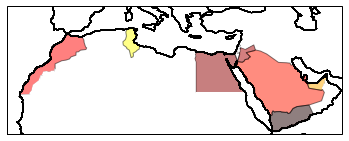

In [78]:
colormap = mpl.cm.hot
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-20, 60, 12, 35])


i = 0
for c in shpreader.Reader(countries_shp).records():
    
    for z in D:
        if c.attributes['iso_a3'] == z:
            score = D[z]
            print c.attributes['name_long']
            #print colormap(score/float(M), 1)
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=colormap(score/float(M), 1), alpha=0.5)
    if c.attributes['iso_a3'] not in D:
        ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor='#ffffff', edgecolor='none')
        ax.coastlines()
ax.can_zoom
plt.show()